# Recurrent Neural Network

**Google stock Price predicting Project📊**

#### Data Preprocessing

##### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training_dataset = pd.read_csv("data/Google_Stock_Price_Train.csv")

In [3]:
training_dataset

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
dataset_train = training_dataset.iloc[:, 1:2].values
dataset_train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

##### **Feature Scaling**

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(dataset_train)

In [6]:
x_train = []
y_train = []
for i in range(60, 1258):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [7]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
x_train.shape, y_train.shape

((1198, 60), (1198,))

In [9]:
x_train[0]

array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
       0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
       0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
       0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
       0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
       0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
       0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
       0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
       0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
       0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
       0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
       0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656])

In [10]:
y_train[0]

0.08627874097775134

#### Reshapping

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## Building RNN

#### Importing keras libraries

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [13]:
# Initializing RNN
regressor = Sequential()

#### Adding the first LSTM layer and add some Dopout regularisation

In [14]:
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


#### Adding second LSTM layer and some Dropout regularistion

In [15]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#### Adding third LSTM layer and some dropout reglarisation

In [16]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#### Adding fourth LSTM layer and some Dropout regularisation

In [17]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#### Adding the Output layer

In [18]:
regressor.add(Dense(1))

#### Compiling the RNN

In [20]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#### Fitting the RNN to the training set

In [21]:
regressor.fit(x_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0430
Epoch 2/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0078
Epoch 3/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0059
Epoch 4/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0060
Epoch 5/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0064
Epoch 6/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0043
Epoch 7/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0044
Epoch 10/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0052
Epoch 11/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0043
Epoch 12/100
1198/1198 [==============================] - 3s 2ms/step - l

1198/1198 [==============================] - 9s 7ms/step - loss: 0.0014
Epoch 96/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0017
Epoch 97/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0013
Epoch 99/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0014


### Making the Predictions and visualising the results

#### Getting the real stock price of 2017

In [23]:
dataset_test = pd.read_csv("data/Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

#### Getting the predicted stock price of 2017

In [35]:
dataset_total = pd.concat((training_dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [37]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualise the result

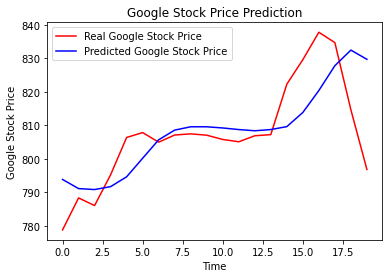

In [38]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()